# THE OUTLINE OF THE FINAL PROJECT

## About the topic

> After careful consideration，I make up my mind to do some exprience of classification about the digits. I searched a lot of material on the net, It seems that the digit classification is a topic which is worthy to try it out and neither too naive or complex. It is a traditional tasks to getting started with machine learning, just like the "hello world" in every language studying. And plenty of help I can get from others work.
    
> Another reason is that, I am ashamed about forgetting too much about calculus and probability theory. Besides I am just a freshman in machine learning. And there is not enough time for me to learn all of these algorithn during this summer school. So I won't choose the topic with complex Mathematical derivation, such as GP etc. But I will learn them later when I is not that busy. 
    
> The digits classification tasks can be deal with plenty of quite different ways. So even if it is simple using one approach, it is also challenging to compare about different ways we have to do with it. 

## About the dataset

1. we will use the small scale dataset which is a built-in dataset in sklearn.datasets at the begining 

2. we will come to the work of the large scale dataset : MNIST dataset, which contain the same thing as sklearn.datasets.digits.

## About the schedule

1. To begin with our work, we work to  import our dataset both MNIST and sklearn.dataset.digits, and show some pictures of these dataset.

2. Deal with Pre-training details

    2.1 Scale the train and test data.
    
    2.2 

3. we do some simple classification using the bulit-in functions, and record their loss corresponding. Some methods we may use is listed as follows.

    2.1 we are going to use different method of KNeighborsClassifier.
    
    2.2 we are going to use KNN with different K values.
    
    2.3 we are going to use SVM which is a common choice to do classification
    
    2.4 we are going to use simple Neural Networks to do this classification.

4. we do some simple transform using the image analysis we have learned in class 10, then using the same way in step 2, and compared their results, figure out whether there is a obvious effect to do so.

5. we will do some Statistical analysis & data analysis to show which is the best way to deal with this classification task.

## Function realization

1. import dataset :
    1.1 we have already import both two dataset successfully.
    
    1.2 we split our data into K-folds to conduct cross-vaildation.
    
2. transhform the picture :

    2.1 image_filter(image, vmin, vmax)
    
    2.2 image_convolve(image, kernel)
    
    2.3 centralize the picture(image)
    
    2.4 sharpening the picture.
    
    2.5 ndimage.gaussian_filter(image, theta)
    
    2.6 edge detection 
    
3. Optimizations 
    3.1 linear classification
    
    3.2 KNN classification 
    
    3.3 SVM classification
    
    3.4 Neural network
4. Statistics 

5. Additionally 

    5.1 add some noisy add using GP to produce some other data from the origin dataset. 
    
    
        

In [1]:
import matplotlib.pylab as plt
import numpy as np

from sklearn import datasets
from scipy import ndimage

In [ ]:
X_small_origin, Y_small_origin = datasets.load_digits(return_X_y=True)

In [ ]:
%pylab inline
# show first 20 picture of the data
fig, axes = plt.subplots(4, 7, figsize = (14, 8))

plt.subplots_adjust(hspace=0, wspace=0)
for i in range(4):
    for j in range(7):
        image = X_small_origin[i*5+j].reshape(-1, 8)
        axes[i, j].imshow(image, cmap=cm.gray)
        axes[i, j].axis('off') #remove ticks

In [2]:
# trying to do some transfrom on the picture 

# first we try some vmin and vmax to decide to boundary of vmin & vmax
# we find that when vmin = 4, vmax = 9 it get best result. 

# our filter function 
def image_filter(image, vmin = 4, vmax = 9):
    # fitlers 
    image_filter_below = (image < vmin)
    image_filter_upper = (image >=vmax)
    # selection to keep to image between vmin-vmax.
    image_upper = image_filter_upper * vmax
    image_below = image_filter_below * vmin
    image_fit = image*(1-image_filter_upper)*(1-image_filter_below) + image_below + image_upper
    # Interval transformation
    image_fit = image_fit - np.ones(image.shape) * vmin
    # show to preformance 
#     imshow(image_fit, cmap="gray")
    return image_fit

In [ ]:
# filter all the picture in our small dataset.
# deal with our dataset.
X_filtered = np.zeros(X_small_origin.shape)

for n,i in enumerate(X_small_origin):
    X_filtered[n] = image_filter(X_small_origin[n].reshape(-1,8)).ravel()

# show our result of after filtering.
for i in range(10):
    imshow(X_filtered[i].reshape(-1,8), cmap="gray")
    plt.show()

In [ ]:
# ndimage.sobel?

edge = ndimage.sobel(X_filtered[0].reshape(-1,8), mode="constant")

imshow(edge, cmap="gray")
colorbar()

In [ ]:
# we would like to do convolution to the picture. 

# In this cell we will just do some test of the first picture in the dataset.

# we will get 2 variant of the origin ones.(smooth one & sharpen one)

# kernel definitions here !
smoothing_convolution_kernel = np.array([[0.1,0.1,0.1],[0.1,0.2,0.1],[0.1,0.1,0.1]])

left_boundary_sharpen_kernel = np.array([[2,3,2],[0,5,0],[-2,-3,-2]]) 

# image_convolve funciton 
def image_convolve(image, kernel = smoothing_convolution_kernel):
    # initialize the size 
    size_img, size_ker = np.array(image.shape), np.array(kernel.shape)
    border_x, border_y = (size_ker / 2).astype(int)
    
    # do some padding to keep the same size of picture.
    image_padding  = np.zeros(size_img+size_ker-np.ones(1).astype(int))
    image_convolve = np.zeros(image.shape)
    image_padding[border_x:-border_x,border_y:-border_y] = image
    
    # Convolve 
    for i in np.arange(1, len(image)+1, 1):
        for j in np.arange(1, len(image[0])+1, 1):
            image_convolve[i-border_x, j-border_y] = np.sum(kernel * image_padding[i-border_x:i+border_x+1,j-border_y:j+border_y+1])     
    
    # sharpen the picture.
    image_sharpen = image + 30 * (image - image_convolve)
    
    # add a filter to avoid noise.
    mean_pixel =  np.mean(image_sharpen)
    print(mean_pixel)
    # test part 
    print(image - image_convolve); print(image)
    # show the graph 
    fig = plt.figure(figsize=(6,6))
    ax1 = plt.subplot(131); ax1.set_title("original")
    imshow(image,cmap="gray")
    ax2 = plt.subplot(132); ax2.set_title("convolve")
    imshow(image_convolve,cmap="gray")
    ax3 = plt.subplot(133); ax3.set_title("sharpen")
    imshow(image_sharpen,cmap="gray")
    colorbar()
    return image_convolve, image_sharpen

smooth_X, sharpen_X = image_convolve(X_small_origin[1].reshape(-1,8))


In [ ]:
print(X_small_scale[0].reshape(-1, 8), sharpen_X)

# Now come to the MNIST dataset

## 1. Importing dataset

we have got 3 different dataset using in different method.

1. X_large_origin : mnist.data 

   Y_large_origin : mnist.target

2. shuffle the train dataset.

    X_train_origin Y_train_origin, X_test_origin Y_test_origin

3. filter all input dataset

    X_train_Filtered Y_train_origin, X_test_Filtered Y_test_orgin

In [3]:
from sklearn.datasets import fetch_mldata
from sklearn import datasets

# import numpy as np
mnist = fetch_mldata('mnist-original', data_home = './datasets/') 
X_large_origin = mnist.data
Y_large_origin = mnist.target

# first 60000 data is used to train our model, the other is used to test. 
X_train_origin, Y_train_origin = X_large_origin[:60000], Y_large_origin[:60000] 
X_test_origin, Y_test_origin = X_large_origin[60000:], Y_large_origin[60000:]

# shuffle the train_dataset(to make k-fold-CV reliable)

    # generate 1~60000 permutation
random_index = np.random.permutation(len(X_train_origin))

    # shuffle according to the permutation.
X_train_origin = X_train_origin[random_index]
Y_train_origin = Y_train_origin[random_index]

In [4]:
%pylab inline
# show first 28 picture of the X_train_origin
fig, axes = plt.subplots(4, 7, figsize = (14, 8))

plt.subplots_adjust(hspace=0, wspace=0)

for i in range(4):
    for j in range(7):
        image = X_train_origin[i*7+j].reshape(-1, 28)
        axes[i, j].imshow(image, cmap="gray")
        axes[i, j].axis('off') #remove ticks

## 2. transfrom the dataset using fliter

In [5]:
def filter_dataset(train_set, test_set):
    
    # initialize the Filtered set.
    Filtered_trainset = np.zeros(train_set.shape)
    Filtered_testset = np.zeros(test_set.shape)
    # transfrom the dataset.
    for n,i in enumerate(train_set):
        Filtered_trainset[n] = image_filter(train_set[n]).ravel()
    for n,i in enumerate(test_set):
        Filtered_testset[n] = image_filter(test_set[n]).ravel()
        
    return Filtered_trainset, Filtered_testset 

X_train_Filtered, X_test_Filtered = filter_dataset(X_train_origin, X_test_origin)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


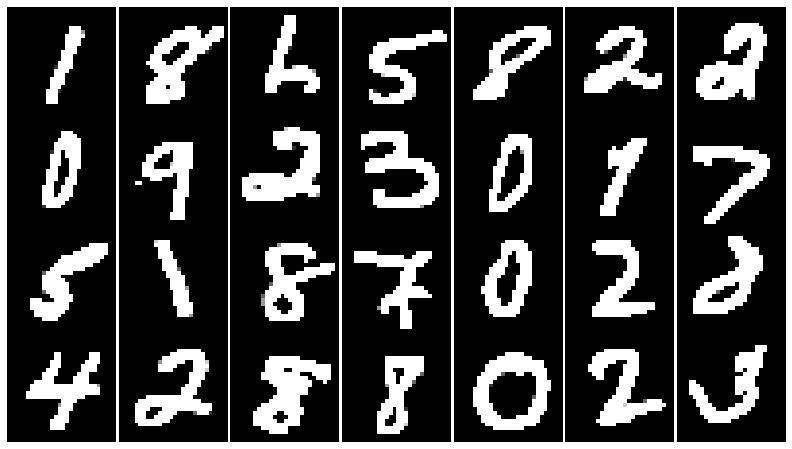

In [9]:
# show first 28 picture of the data after filter
fig, axes = plt.subplots(4, 7, figsize = (14, 8))

plt.subplots_adjust(hspace=0, wspace=0)
for i in range(4):
    for j in range(7):
        image = X_train_Filtered[7*i+j].reshape(-1, 28)
        axes[i, j].imshow(image, cmap=cm.gray)
        axes[i, j].axis('off') #remove ticks

## 3. Training (Classification) 

### **3.1 SGD method**

In [44]:
# SGD classification without using K-fold-CV

from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from datascience import Table

def get_sgd_accuracy(Random_state_list):
    
    accuracy_org = accuracy_flt = np.array([])
    homogeneity_score_org = homogeneity_score_flt = np.array([])
    completeness_score_org = completeness_score_flt  = np.array([])
    v_measure_score_org = v_measure_score_flt = np.array([])
    
    for n, rand_state in enumerate(Random_state_list):
        sgd_clf = SGDClassifier(random_state=rand_state)
        
        # train our data using the origin dataset.
        sgd_clf.fit(X_train_origin, Y_train_origin)
        # prediction the accuracy
        accuracy_org = np.append(accuracy_org, 
                                 metrics.accuracy_score(Y_test_origin, sgd_clf.predict(X_test_origin)))
        homogeneity_score_org = np.append(homogeneity_score_org, 
                                          metrics.homogeneity_score(Y_test_origin, sgd_clf.predict(X_test_origin)))
        completeness_score_org = np.append(completeness_score_org, 
                                           metrics.completeness_score(Y_test_origin, sgd_clf.predict(X_test_origin)))   
        v_measure_score_org = np.append(v_measure_score_org,
                                        metrics.completeness_score(Y_test_origin, sgd_clf.predict(X_test_origin)))
    
        # train our data using the filtered dataset.
        sgd_clf.fit(X_train_Filtered, Y_train_origin)
        # prediction the accuracy
        accuracy_flt = np.append(accuracy_flt, 
                                 metrics.accuracy_score(Y_test_origin, sgd_clf.predict(X_test_Filtered)))
        homogeneity_score_flt = np.append(homogeneity_score_flt, 
                                          metrics.homogeneity_score(Y_test_origin, sgd_clf.predict(X_test_Filtered)))
        completeness_score_flt = np.append(completeness_score_flt, 
                                           metrics.completeness_score(Y_test_origin, sgd_clf.predict(X_test_Filtered)))   
        v_measure_score_flt = np.append(v_measure_score_flt,
                                        metrics.completeness_score(Y_test_origin, sgd_clf.predict(X_test_Filtered)))
    # make a table
    table_org = Table().with_columns(['random_seed', Random_state_list,
                                  'accuracy_socre', accuracy_org,
                                  'homogeneity_score', homogeneity_score_org,
                                  'completeness_score', completeness_score_org,
                                  'v_measure_score', v_measure_score_org])
    table_flt = Table().with_columns(['random_seed', Random_state_list,
                                  'accuracy_socre', accuracy_flt,
                                  'homogeneity_score', homogeneity_score_flt,
                                  'completeness_score', completeness_score_flt,
                                  'v_measure_score', v_measure_score_flt])
    return table_org, table_flt

In [19]:
random_seed = np.arange(20, 30, 1)
table_sgd_ori, table_sgd_flt = get_sgd_accuracy(random_seed)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


20 0.8723 0.8566
21 0.8491 0.8625
22 0.8584 0.8739
23 0.8489 0.883
24 0.8612 0.8719
25 0.8677 0.8989
26 0.867 0.864
27 0.846 0.8713
28 0.8333 0.8837
29 0.8643 0.8742


In [21]:
table_sgd_ori

random_seed,accuracy_socre,homogeneity_score,completeness_score,v_measure_score
20,0.8723,0.756398,0.761479,0.761479
21,0.8491,0.727664,0.737709,0.737709
22,0.8584,0.745505,0.750305,0.750305
23,0.8489,0.740169,0.751193,0.751193
24,0.8612,0.747496,0.752652,0.752652
25,0.8677,0.753803,0.756619,0.756619
26,0.867,0.743598,0.746958,0.746958
27,0.846,0.72205,0.728855,0.728855
28,0.8333,0.717829,0.731763,0.731763
29,0.8643,0.742711,0.747651,0.747651


In [22]:
table_sgd_flt

random_seed,accuracy_socre,homogeneity_score,completeness_score,v_measure_score
20,0.8566,0.741446,0.751778,0.751778
21,0.8625,0.744846,0.752082,0.752082
22,0.8739,0.753839,0.756269,0.756269
23,0.883,0.771112,0.774637,0.774637
24,0.8719,0.753545,0.758132,0.758132
25,0.8989,0.783997,0.784555,0.784555
26,0.864,0.74333,0.749367,0.749367
27,0.8713,0.750104,0.753941,0.753941
28,0.8837,0.766667,0.770587,0.770587
29,0.8742,0.751774,0.756519,0.756519


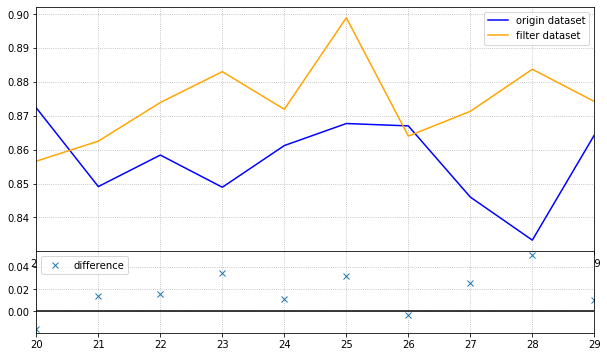

In [27]:
# do some Statistics 
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0)
gs = GridSpec(4, 4)

ax1 = plt.subplot(gs[:3,:])
ax1.plot(random_seed, table_sgd_ori['accuracy_socre'], color = "blue", label = "origin dataset")
ax1.plot(random_seed, table_sgd_flt['accuracy_socre'], color = "orange", label = "filter dataset")
ax1.legend()
ax1.grid(linestyle = ":")
ax2 = plt.subplot(gs[3,:], sharex=ax1)
ax2.plot(random_seed, table_sgd_flt['accuracy_socre'] - table_sgd_ori['accuracy_socre'], "x", label = "difference")
ax2.plot(random_seed, np.zeros(random_seed.shape), color = "black")
ax2.set_xlim(20,29)
ax2.legend()
ax2.grid(linestyle = ":")

### **3.2 Using pca decomposition & KNN method**

In [46]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

X_large_fliter = np.concatenate((X_train_Filtered, X_test_Filtered), axis = 0)
Y_large_filter = np.concatenate((Y_train_origin, Y_test_origin), axis = 0)

#### decomposite into 2 dimension & visualizition

[[], [], Text(0.5, 1.0, 'filtered')]

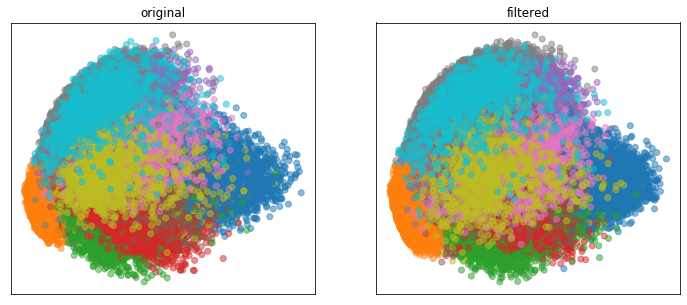

In [47]:
# construct a estimator 
pca = PCA(n_components=2)
# transform our dataset.
X_dec_org_2 = pca.fit_transform(X_large_origin)
X_dec_flt_2 = pca.fit_transform(X_large_fliter)
# visualizition
fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)
plt.scatter(X_dec_org_2[:,0], X_dec_org_2[:,1], c = Y_large_origin,
                 cmap = plt.cm.get_cmap("tab10", 10), alpha = 0.5)
ax1.set(xticks=[], yticks=[], title="original")
ax2 = plt.subplot(122)
plt.scatter(X_dec_flt_2[:,0], X_dec_flt_2[:,1], c = Y_large_filter,
                 cmap = plt.cm.get_cmap("tab10", 10), alpha = 0.5)
ax2.set(xticks=[], yticks=[], title="filtered")

we can find that the overlap is obvious!!

KNN without using pca decomposition

In [82]:
# just use the origin dataset
X_train_origin_10 = X_train_origin
X_train_Filtered_10 = X_train_Filtered

# just use the origin dataset

X_test_origin_10 = X_test_origin
X_test_Filtered_10 = X_test_Filtered

In [104]:
def get_knn_accuracy():
    
    accuracy_org = accuracy_flt = np.array([])
    homogeneity_score_org = homogeneity_score_flt = np.array([])
    completeness_score_org = completeness_score_flt  = np.array([])
    v_measure_score_org = v_measure_score_flt = np.array([])
    
    for weight in ['uniform', 'distance']:
        knn_clf = KNeighborsClassifier(n_neighbors=50, weights=weight)
        
        knn_clf.fit(X_train_origin_10, Y_train_origin)
        y_pred_ori = knn_clf.predict(X_test_origin_10)
        # prediction the accuracy
        accuracy_org = np.append(accuracy_org, 
                                 metrics.accuracy_score(Y_test_origin, y_pred_ori))
        homogeneity_score_org = np.append(homogeneity_score_org, 
                                          metrics.homogeneity_score(Y_test_origin, y_pred_ori))
        completeness_score_org = np.append(completeness_score_org, 
                                           metrics.completeness_score(Y_test_origin, y_pred_ori))   
        v_measure_score_org = np.append(v_measure_score_org,
                                        metrics.completeness_score(Y_test_origin, y_pred_ori))
        
        
        knn_clf.fit(X_train_Filtered_10, Y_train_origin)
        y_pred_flt = knn_clf.predict(X_test_Filtered_10)
        # prediction the accuracy
        accuracy_flt = np.append(accuracy_flt, 
                                 metrics.accuracy_score(Y_test_origin, y_pred_flt))
        homogeneity_score_flt = np.append(homogeneity_score_flt, 
                                          metrics.homogeneity_score(Y_test_origin, y_pred_flt))
        completeness_score_flt = np.append(completeness_score_flt, 
                                           metrics.completeness_score(Y_test_origin, y_pred_flt))   
        v_measure_score_flt = np.append(v_measure_score_flt,
                                        metrics.completeness_score(Y_test_origin, y_pred_flt))
    # make a table
    table_org = Table().with_columns(['weight', ['uniform', 'distance'],
                                  'accuracy_socre', accuracy_org,
                                  'homogeneity_score', homogeneity_score_org,
                                  'completeness_score', completeness_score_org,
                                  'v_measure_score', v_measure_score_org])
    table_flt = Table().with_columns(['weight', ['uniform', 'distance'],
                                  'accuracy_socre', accuracy_flt,
                                  'homogeneity_score', homogeneity_score_flt,
                                  'completeness_score', completeness_score_flt,
                                  'v_measure_score', v_measure_score_flt])
    return table_org, table_flt

In [84]:
table_knn_ori, table_knn_flt = get_knn_accuracy()
table_knn_ori

weight,accuracy_socre,homogeneity_score,completeness_score,v_measure_score
uniform,0.9625,0.906717,0.907321,0.907321
distance,0.9633,0.908262,0.908826,0.908826


In [85]:
table_knn_flt

weight,accuracy_socre,homogeneity_score,completeness_score,v_measure_score
uniform,0.9602,0.902635,0.903342,0.903342
distance,0.9611,0.904811,0.90547,0.90547


It seems that KNN can catch the feather perfectly. But It takes really a long time!(about 50mins)!

So now we just using pca to decomposite the feather space and find the minimum dimension to get the accuracy about 90%.

In [105]:
 pca = PCA(n_components=392)
        
# transform our train dataset.
X_train_origin_10 = pca.fit_transform(X_train_origin)
X_train_Filtered_10 = pca.fit_transform(X_train_Filtered)
# transform our test dataset
X_test_origin_10 = pca.fit_transform(X_test_origin)
X_test_Filtered_10 = pca.fit_transform(X_test_Filtered)
    
table_org, table_flt = get_knn_accuracy()

In [106]:
table_org

weight,accuracy_socre,homogeneity_score,completeness_score,v_measure_score
uniform,0.1327,0.261624,0.275901,0.275901
distance,0.1329,0.26106,0.275033,0.275033


In [107]:
table_flt

weight,accuracy_socre,homogeneity_score,completeness_score,v_measure_score
uniform,0.5338,0.375272,0.387064,0.387064
distance,0.5338,0.375674,0.387448,0.387448


pca can save much of our training time(when n_component is 196, only 10min is needed), But we find that pca perform very badly even when n_component is quite big.

### **3.3 Using SVM method**

In [ ]:
from sklearn.svm import SVM


### **3.4 Using Neural Networks method**